In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [175]:
df = pd.read_csv("cardata.csv")
df.head(30)

,mpg,cyl,displ,hp,weight,accel,origin
0,18.0,8,307.0,130.0,3504.0,12.0,1
1,15.0,8,350.0,165.0,3693.0,11.5,1
2,18.0,8,318.0,150.0,3436.0,11.0,1
3,16.0,8,304.0,150.0,3433.0,12.0,1
4,17.0,8,302.0,140.0,3449.0,10.5,1
5,15.0,8,429.0,198.0,4341.0,10.0,1
6,14.0,8,454.0,220.0,4354.0,9.0,1
7,14.0,8,440.0,215.0,4312.0,8.5,1
8,14.0,8,455.0,225.0,4425.0,10.0,1
9,15.0,8,390.0,190.0,3850.0,8.5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2788178eb8>,
      dtype=object)

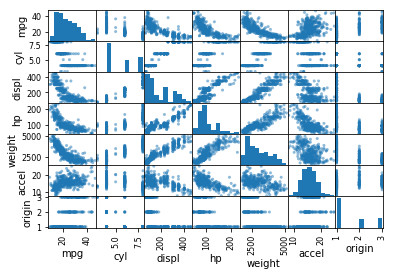

In [176]:
pd.plotting.scatter_matrix(df)

In [177]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [178]:
unis = np.unique(np.array(df["cyl"])).tolist()

In [179]:
cylinders = np.array(df["cyl"])

How many items there are for each value of cylinders

In [180]:
[list(cylinders).count(j) for j in unis]

[4, 199, 3, 83, 103]

Class definitions: 
 1. 0 will be 3 or 4
 2. 1 will be 5 or 6
 3. 2 will be 8

In [181]:
classvals = [0,0,1,1,2]

In [182]:
Y = [classvals[unis.index(x)] for x in cylinders]
Y = np.array(Y)

In [183]:
df.columns

Index(['mpg', 'cyl', 'displ', 'hp', 'weight', 'accel', 'origin'], dtype='object')

In [184]:
X = np.array(df[["mpg","accel"]])
X[:5]

array([[18. , 12. ],
       [15. , 11.5],
       [18. , 11. ],
       [16. , 12. ],
       [17. , 10.5]])

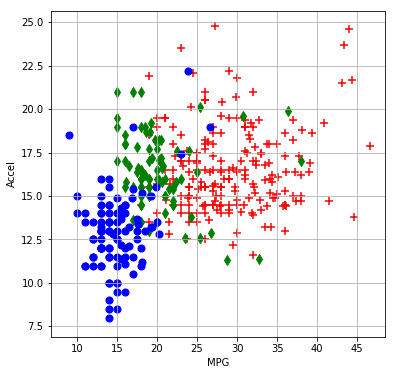

In [185]:
colors=["red","green","blue"]
markers=["+","d","o"]
nclasses=3
for i in range(nclasses):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=50)
    
plt.xlabel("MPG")
plt.ylabel("Accel")
plt.grid()
plt.gcf().set_size_inches(6,6)

In [186]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [188]:
gnb = GaussianNB()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    gnb.fit(xtrain,ytrain)
    YP = gnb.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.14042857142857146 0.031220748075129114


Text(0, 0.5, 'Frequency(count)')

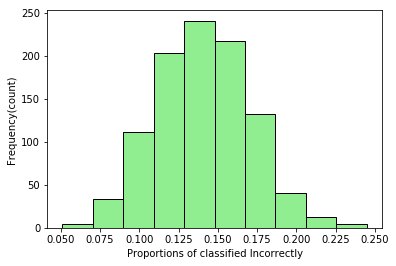

In [189]:
plt.hist(errs, edgecolor="black", color = "lightgreen")
plt.xlabel("Proportions of classified Incorrectly")
plt.ylabel("Frequency(count)")

In [191]:
np.array(df["origin"])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 3,
       3, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 3, 1, 2, 1, 2,
       2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 3, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 1, 2, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2, 3, 2, 3,
       2, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 3, 1, 1, 3, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 2, 1, 1, 1,

In [199]:
DF=pd.get_dummies(df,columns=["origin"])
X=np.array(DF.drop(columns=["cyl"]))

In [200]:
gnb = GaussianNB()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    gnb.fit(xtrain,ytrain)
    YP = gnb.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.09920408163265305 0.027438766023328495


Text(0, 0.5, 'Frequency(count)')

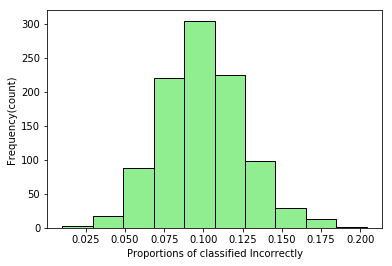

In [203]:
plt.hist(errs, edgecolor="black", color = "lightgreen")
plt.xlabel("Proportions of classified Incorrectly")
plt.ylabel("Frequency(count)")

In [204]:
X = np.array(df[["mpg","accel"]])
X[:5]

array([[18. , 12. ],
       [15. , 11.5],
       [18. , 11. ],
       [16. , 12. ],
       [17. , 10.5]])

In [205]:
from sklearn.neighbors import KNeighborsClassifier

In [211]:
KNN = KNeighborsClassifier(n_neighbors=13)
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    KNN.fit(xtrain,ytrain)
    YP = KNN.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.13492857142857143 0.030186272673063567


Voronoi cell

Discriminant QDA

In [213]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [214]:
model=QDA()
errs=[]
nsplits=1000
for split in range(nsplits):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y)
    model.fit(xtrain,ytrain)
    YP = model.predict(xtest)
    errs.append(1-accuracy_score(ytest, YP))
print(np.mean(errs), np.std(errs))

0.14732653061224488 0.031024697608909597
